In [51]:
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import *
import numpy as np
import random
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import albumentations as A
import cv2

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
#     transforms.Normalize((0.5,0.5,0.5),(0.224,0.224,0.224))
])

In [29]:
t2=transforms.Compose([
    transforms.Resize((224,224))
])

In [76]:
class Mydataset(Dataset):
    def __init__(self,path,transform=None):
        super(Mydataset).__init__()
        self.path=path
        self.transform=transform
        
    def __len__(self):
        return len(self.path)
    
    def __getitem__(self,idx):
        img = self.path[idx]
        label = img.split('/')[-2]
#         label = ctoi[label]
        
        img = cv2.imread(img)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        img = self.transform(image=img)['image']
            
        return img,label

In [63]:
tf2=A.Compose([
    A.Resize(224,224),
])

In [77]:
import os
from glob import glob
train_path = '/media/data2/rjsdn/dacon/basic_image_classification/train/'
trainlist = [y for x in os.walk(train_path) for y in sorted(glob(os.path.join(x[0],'*.jpg')))]

In [78]:
train = Mydataset(trainlist,tf2)

In [138]:
img = train[5]

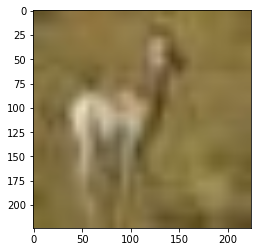

In [139]:
plt.imshow(img[0])

In [174]:
tf=A.Compose([
    A.Resize(224,224),
    A.Blur(p=1)
])

In [175]:
img[1]

'deer'

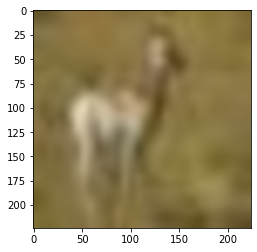

In [176]:
x=tf(image=img[0])['image']
plt.imshow(x)

In [166]:
train[0][0].size()

TypeError: 'int' object is not callable

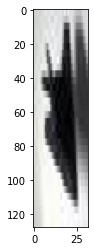

In [27]:
up = nn.Upsample(scale_factor=4)
up2 = up(train[0][0])
plt.imshow(np.transpose(up2,(2,1,0)))

In [13]:
np.sqrt(5)

2.23606797749979